# Shifting a Solution to the Fixed Frame of Reference

We solve the problem in the shifted frame of reference. This means we can keep the time in the system separate from the distance L. If we want to look at how a field actually propagates in time, we need to shift back to a fixed or lab frame of reference. To do that we need to connect the time and space dimensions via the speed of light in the system. Here we'll demonstrate that with a two-level system with no interaction strength, so that the light pulse travels through unimpeded as in a vacuum. In the moving frame of reference, that means the pulse arrives at the same time as it departed, $t = 0$. In the fixed frame it will arrive some finite time later.

## Define the Problem

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "centre_1": 0.0,
          "fwhm_1": 1.0
        },
        "rabi_freq_t_func": "gaussian_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 100,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 100,
  "z_steps_inner": 2,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    0.0
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "mb-solve-fixed-frame"
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 2.14 ms, sys: 3.2 ms, total: 5.34 ms
Wall time: 14.3 ms


## Field Output

In the moving frame of reference, we see that the pulse arrives at the back of the medium ($z = 1$) at the same time ($t = 0$) it left the front of the medium ($z = 0$).

This of course is non-physical — the information in the pulse must take some finite time to cross the medium.

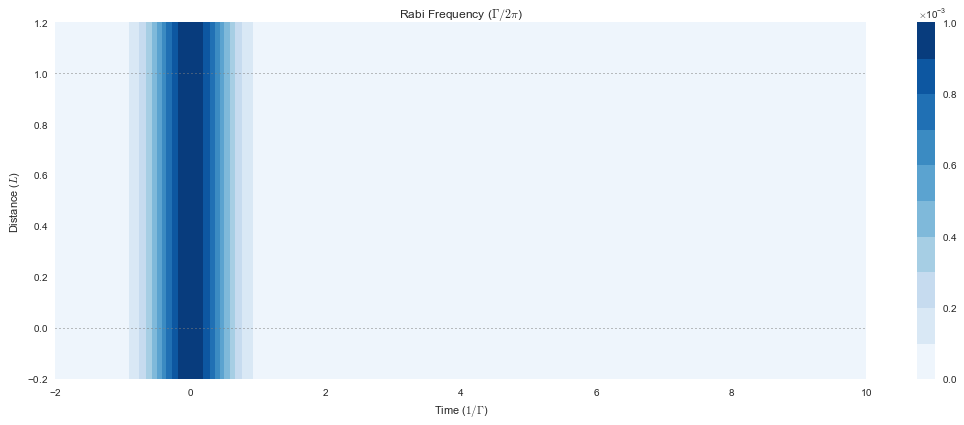

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)

##  Shifting to the Fixed Frame

To return the solution to a physical system, we must introduce a relation between the time and space dimensions in the problem. This is given by the speed of light in the chosen units.

For example, if in our lab system the speed of light is such that in vacuum it will cover the length of the medium $1.0 L$ in $2.0 \tau$, then the speed of light must be $0.5 L/\tau$.

Note that this is just a skewing of the results along the time axis to return it to the 'real' time. Nothing changes in the problem.

We get the fixed frame tlist with the call

    tlist_fixed_frame(speed_of_light)
    
and the field via

    Omegas_fixed_frame(field_idx=0, speed_of_light)

In [5]:
speed_of_light = 0.5 # [L Γ]

tlist_fixed_frame = mb_solve_00.tlist_fixed_frame(speed_of_light)
field_fixed_frame = mb_solve_00.Omegas_fixed_frame(0, speed_of_light)

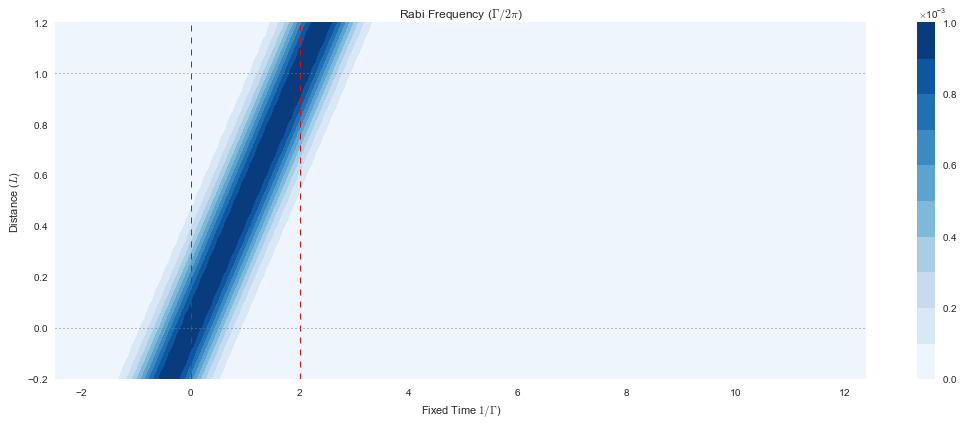

In [6]:
fig = plt.figure(2, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mb_solve_00.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time $1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)

And we can change the speed of light if we like.

If in our lab system the speed of light is such that in vacuum it will cover the length of the medium $1.0 L$ in $5.0 \tau$, then the speed of light must be $0.2 L/\tau$.

In [7]:
speed_of_light = 0.2 # [L Γ]

tlist_fixed_frame = mb_solve_00.tlist_fixed_frame(speed_of_light)
field_fixed_frame = mb_solve_00.Omegas_fixed_frame(0, speed_of_light, interp_kind='cubic')

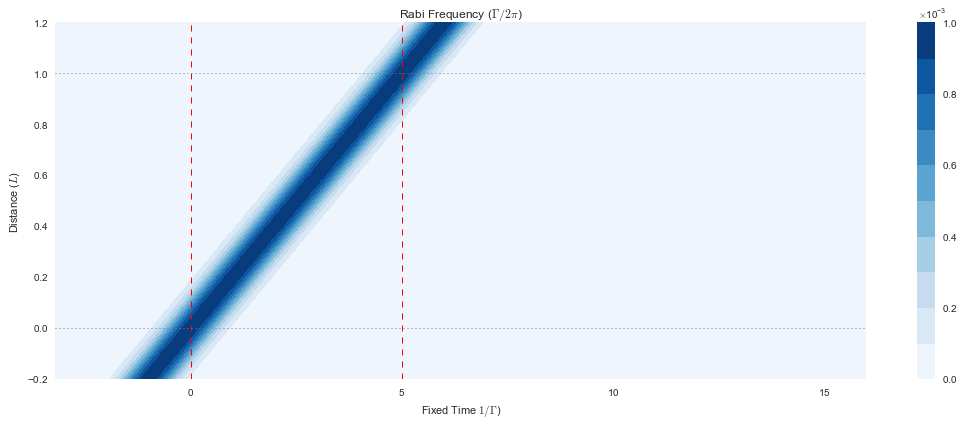

In [8]:
fig = plt.figure(2, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(tlist_fixed_frame, mb_solve_00.zlist, 
                 np.abs(field_fixed_frame/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time $1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for x in [0.0, 1/speed_of_light]:
    ax.axvline(x, c='red', lw=1.0, ls='dashed')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/mb-solve-fixed-frame.png')

The field must be interpolated to find the value at the shifted time points. We can choose the kind of spline interpolation with `interp_kind` which may be `'linear'`, `'cubic'` or `'quintic'`. It is linear by default.